In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
import sklearn
import keras
import tensorflow

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
index = test.index

train_labels = train.label
train = train.drop(columns = "label")

# Preparing data for neural network

train = train.values.astype("float") / 255
test = test.values.astype("float") / 255

In [3]:
train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (42000, 784)
Test shape: (28000, 784)


### Sample images from train dataset

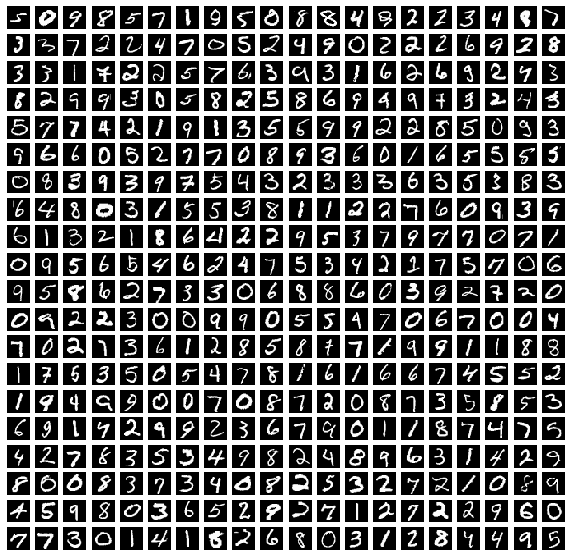

In [5]:
images = np.random.choice(train.shape[0], 400)
plt.figure(figsize = (10, 10))
for i in range(400):
    plt.subplot(20, 20, i + 1)
    plt.imshow(train[images[i]].reshape((28, 28)), cmap = "gray")
    plt.axis("off")

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size = 0.2, random_state = 42)

In [7]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

network = models.Sequential()

network.add(layers.Dense(512, activation = "relu", input_shape = (28*28,)))
network.add(layers.Dense(256, activation = "relu"))
network.add(layers.Dense(10, activation = "softmax"))

network.compile(optimizer = optimizers.RMSprop(learning_rate = 0.01),
               loss = losses.categorical_crossentropy,
               metrics = [metrics.categorical_accuracy])



# We can also use below solution but it is less flexible
'''
network.compile(optimizer = "rmsprop",
               loss = "categorical_crossentropy",
               metrics = ["accuracy"])
'''

'\nnetwork.compile(optimizer = "rmsprop",\n               loss = "categorical_crossentropy",\n               metrics = ["accuracy"])\n'

In [9]:
history = network.fit(X_train, y_train, batch_size = 256, epochs = 40, validation_data = (X_test, y_test))

Epoch 1/40
132/132 [==============================] - 2s 12ms/step - loss: 1.1057 - categorical_accuracy: 0.8408 - val_loss: 0.3192 - val_categorical_accuracy: 0.9126
Epoch 2/40
132/132 [==============================] - 2s 12ms/step - loss: 0.1912 - categorical_accuracy: 0.9462 - val_loss: 0.3018 - val_categorical_accuracy: 0.9269
Epoch 3/40
132/132 [==============================] - 2s 13ms/step - loss: 0.1380 - categorical_accuracy: 0.9612 - val_loss: 0.1774 - val_categorical_accuracy: 0.9540
Epoch 4/40
132/132 [==============================] - 2s 13ms/step - loss: 0.1165 - categorical_accuracy: 0.9695 - val_loss: 0.2157 - val_categorical_accuracy: 0.9545
Epoch 5/40
132/132 [==============================] - 2s 12ms/step - loss: 0.1053 - categorical_accuracy: 0.9723 - val_loss: 0.1761 - val_categorical_accuracy: 0.9617
Epoch 6/40
132/132 [==============================] - 2s 13ms/step - loss: 0.0933 - categorical_accuracy: 0.9763 - val_loss: 0.2328 - val_categorical_accuracy: 0.962

In [10]:
history_dict = history.history
history_dict

{'loss': [1.1057199239730835,
  0.19123554229736328,
  0.13798901438713074,
  0.1165098026394844,
  0.10534650832414627,
  0.09332488477230072,
  0.07949014753103256,
  0.0777687057852745,
  0.07172783464193344,
  0.0710594579577446,
  0.06701258569955826,
  0.06185436248779297,
  0.06018165126442909,
  0.06984232366085052,
  0.059574149549007416,
  0.050953496247529984,
  0.05168699845671654,
  0.05558731406927109,
  0.046401120722293854,
  0.049874380230903625,
  0.06912731379270554,
  0.048302143812179565,
  0.05434161052107811,
  0.04438549652695656,
  0.050018310546875,
  0.04823310673236847,
  0.04215892404317856,
  0.05381080135703087,
  0.042532917112112045,
  0.03233358636498451,
  0.03869064897298813,
  0.05664769187569618,
  0.039243489503860474,
  0.03474374860525131,
  0.03788517415523529,
  0.04434453323483467,
  0.048388514667749405,
  0.03770703449845314,
  0.033213723450899124,
  0.03603050485253334],
 'categorical_accuracy': [0.840833306312561,
  0.9461607336997986,
 

Text(0, 0.5, 'Loss')

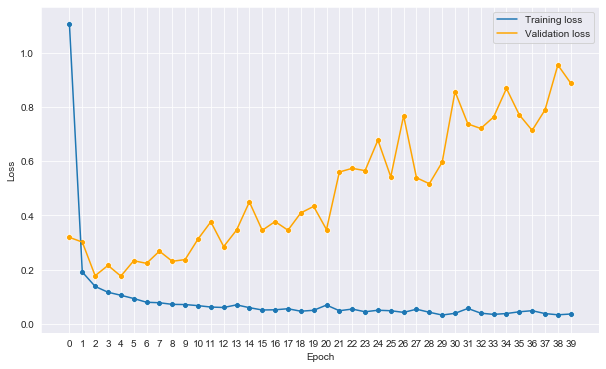

In [11]:
plt.figure(figsize = (10, 6))

sns.lineplot(x = range(len(history_dict["loss"])), y = history_dict["loss"], label = "Training loss")
sns.scatterplot(x = range(len(history_dict["loss"])), y = history_dict["loss"])

sns.lineplot(x = range(len(history_dict["val_loss"])), y = history_dict["val_loss"], color = "orange", label = "Validation loss")
sns.scatterplot(x = range(len(history_dict["val_loss"])), y = history_dict["val_loss"], color = "orange")

plt.xticks(range(40))

plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Categorical accuracy')

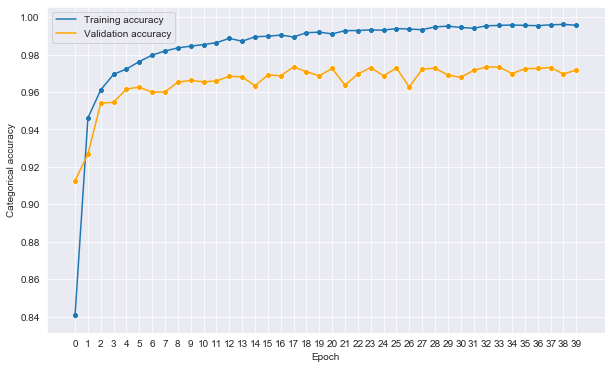

In [12]:
plt.figure(figsize = (10, 6))

sns.lineplot(x = range(len(history_dict["categorical_accuracy"])), y = history_dict["categorical_accuracy"], label = "Training accuracy")
sns.scatterplot(x = range(len(history_dict["categorical_accuracy"])), y = history_dict["categorical_accuracy"])

sns.lineplot(x = range(len(history_dict["val_categorical_accuracy"])), y = history_dict["val_categorical_accuracy"], color = "orange", label = "Validation accuracy")
sns.scatterplot(x = range(len(history_dict["val_categorical_accuracy"])), y = history_dict["val_categorical_accuracy"], color = "orange")

plt.xticks(range(40))

plt.xlabel("Epoch")
plt.ylabel("Categorical accuracy")

In [13]:
network.evaluate(X_test, y_test)

263/263 [==============================] - 0s 1ms/step - loss: 0.8889 - categorical_accuracy: 0.9718


[0.8888977766036987, 0.9717857241630554]

Accuracy score: 0.9717857142857143
     0    1    2    3    4    5    6    7    8    9
0  795    0   11    1    0    1    5    0    0    3
1    0  900    3    1    0    1    2    0    2    0
2    1    5  827    3    6    0    0    0    3    1
3    1    0    4  906    0    8    0    2    8    8
4    0    0    1    1  813    0    5    1    0   18
5    0    0    0    6    0  685    4    2    1    4
6    2    0    0    0    0    2  780    0    1    0
7    0    0   15    5    5    1    0  842    2   23
8    0    3    2    8    8    9    2    1  790   12
9    0    0    1    3    4    4    0    1    0  825


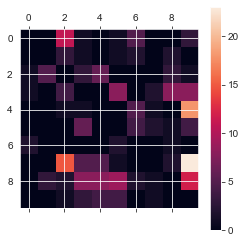

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = np.argmax(network.predict(X_test), axis = 1)

print("Accuracy score:", accuracy_score(np.argmax(y_test, axis = 1), y_test_pred))
conf_mx = pd.DataFrame(confusion_matrix(np.argmax(y_test, axis = 1), y_test_pred), index = np.arange(0, 10), columns = np.arange(0, 10))
print(conf_mx)
np.fill_diagonal(conf_mx.values, 0)

plt.matshow(conf_mx)
plt.colorbar()

### Implemented neural network has high test accuracy score but it make some mistakes. Let's see on which images (here are shown 20 wrong classified images). Some of this images are difficult to recognize by human eye.

Predicted number: 5
Real number: 8
Image:


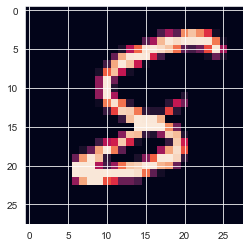

Predicted number: 7
Real number: 9
Image:


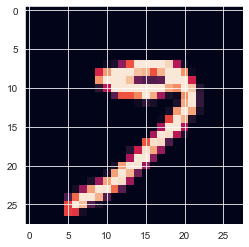

Predicted number: 9
Real number: 8
Image:


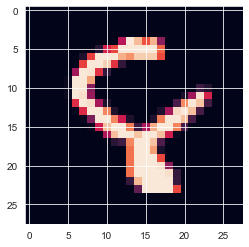

Predicted number: 4
Real number: 7
Image:


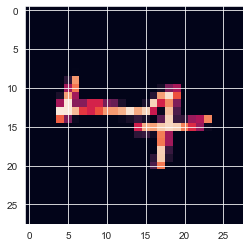

Predicted number: 9
Real number: 5
Image:


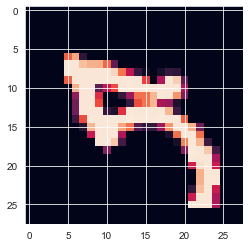

Predicted number: 9
Real number: 7
Image:


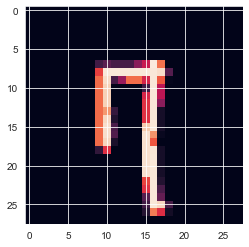

Predicted number: 8
Real number: 1
Image:


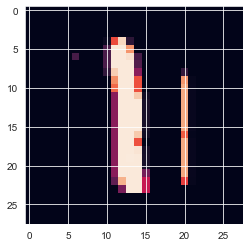

Predicted number: 4
Real number: 7
Image:


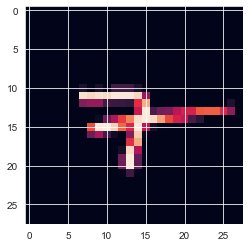

Predicted number: 3
Real number: 9
Image:


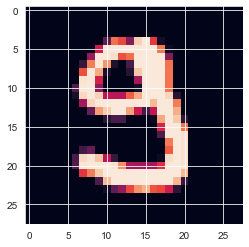

Predicted number: 2
Real number: 9
Image:


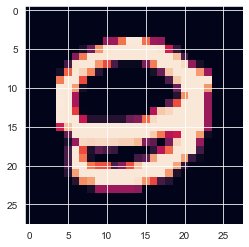

Predicted number: 3
Real number: 1
Image:


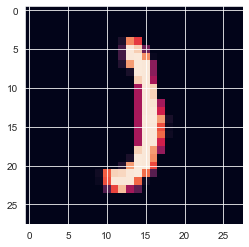

Predicted number: 9
Real number: 7
Image:


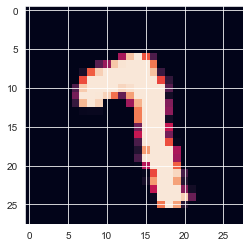

Predicted number: 3
Real number: 5
Image:


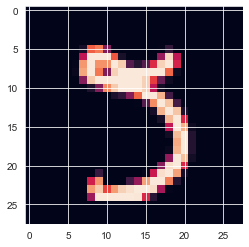

Predicted number: 6
Real number: 0
Image:


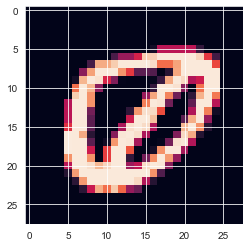

Predicted number: 9
Real number: 7
Image:


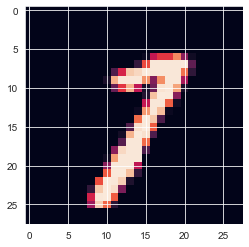

Predicted number: 9
Real number: 2
Image:


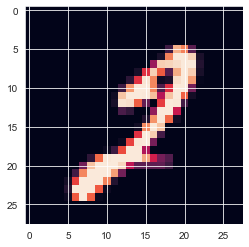

Predicted number: 9
Real number: 7
Image:


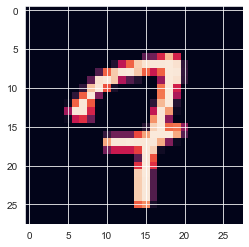

Predicted number: 9
Real number: 7
Image:


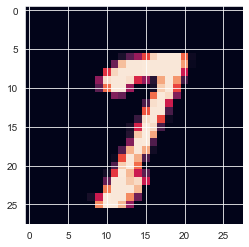

Predicted number: 9
Real number: 7
Image:


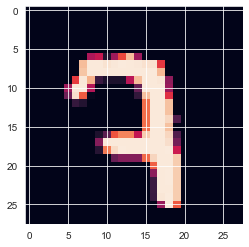

Predicted number: 4
Real number: 9
Image:


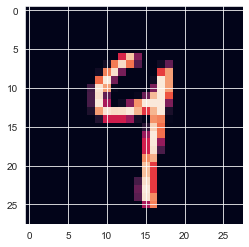

Predicted number: 9
Real number: 7
Image:


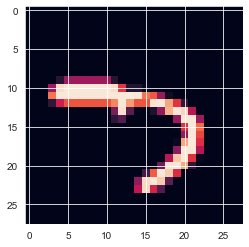

In [15]:
for i in range(np.sum([np.argmax(y_test, axis = 1) != y_test_pred])):
    print("Predicted number:", y_test_pred[(np.argmax(y_test, axis = 1) != y_test_pred)][i])
    print("Real number:", np.argmax(y_test, axis = 1)[(np.argmax(y_test, axis = 1) != y_test_pred)][i])
    print("Image:")
    plt.imshow(X_test[(np.argmax(y_test, axis = 1) != y_test_pred)][i].reshape(28, 28))
    plt.show()
    if i == 20:
        break

#### Accuracy plot shows that after few epochs validation accuracy don't gain so to retrain network will be used 10 epochs.

In [25]:
network = models.Sequential()

network.add(layers.Dense(512, activation = "relu", input_shape = (28*28,)))
network.add(layers.Dense(256, activation = "relu"))
network.add(layers.Dense(10, activation = "softmax"))

network.compile(optimizer = optimizers.RMSprop(learning_rate = 0.01),
               loss = losses.categorical_crossentropy,
               metrics = [metrics.categorical_accuracy])

network.fit(train, to_categorical(train_labels), batch_size = 256, epochs = 7)

Epoch 1/7
165/165 [==============================] - 2s 9ms/step - loss: 0.6820 - categorical_accuracy: 0.8641
Epoch 2/7
165/165 [==============================] - 1s 8ms/step - loss: 0.1651 - categorical_accuracy: 0.9522
Epoch 3/7
165/165 [==============================] - 1s 9ms/step - loss: 0.1311 - categorical_accuracy: 0.9640
Epoch 4/7
165/165 [==============================] - 1s 9ms/step - loss: 0.1098 - categorical_accuracy: 0.9712
Epoch 5/7
165/165 [==============================] - 1s 8ms/step - loss: 0.0965 - categorical_accuracy: 0.9740
Epoch 6/7
165/165 [==============================] - 1s 9ms/step - loss: 0.0876 - categorical_accuracy: 0.9783
Epoch 7/7
165/165 [==============================] - 1s 8ms/step - loss: 0.0833 - categorical_accuracy: 0.9804


In [26]:
test_pred = np.argmax(network.predict(test), axis = 1)

In [27]:
digit_submission = (pd.concat([pd.Series(range(len(index)), name = "ImageId") + 1, 
            pd.Series(test_pred, name = "Label")], axis = 1).set_index("ImageId"))

digit_submission

digit_submission.to_csv("digit_submission_nn.csv")